In [ ]:
# script to compare top 100 predictions.
# Input file: all_predict_checkpoints_trial1_LSTM_3000_0_1_top100.csv

In [17]:
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib_venn import venn2, venn2_circles
%pylab inline


Populating the interactive namespace from numpy and matplotlib


In [18]:
df_ravi = pd.read_csv('all_predict_checkpoints_trial1_LSTM_3000_0_1_top100.csv', delimiter='\t')

In [19]:
def plot_venn_diagram(data1, data2, oname='output.png'):
    # print data1.values, data2.values
    AB = 0
    arr_comman=[]
    for i in range(0, len(data1.values)):
        if data1.values[i] in data2.values:
            arr_comman.append(data1.values[i])
            AB += 1
   
    Ab = len(data1) - AB
    aB = len(data2) - AB
    
    print AB, Ab, aB
    s = (
        Ab,  # Ab
        aB,  # aB
        AB,  # AB
    )

    v = venn2(subsets=s, set_labels=('A', 'B'))

    # Subset labels
    v.get_label_by_id('10').set_text('Ab ='+str(Ab))
    v.get_label_by_id('01').set_text('bA ='+str(aB))
    v.get_label_by_id('11').set_text('AB ='+str(AB))

    # Subset colors
    v.get_patch_by_id('10').set_color('c')
    v.get_patch_by_id('01').set_color('#993333')
    v.get_patch_by_id('11').set_color('blue')

    # Subset alphas
    v.get_patch_by_id('10').set_alpha(0.4)
    v.get_patch_by_id('01').set_alpha(1.0)
    v.get_patch_by_id('11').set_alpha(0.7)

    # Border styles
    c = venn2_circles(subsets=s, linestyle='solid')
    c[0].set_ls('dashed')  # Line style
    c[0].set_lw(2.0)       # Line width

    plt.savefig(oname)
    return arr_comman

40 60 60


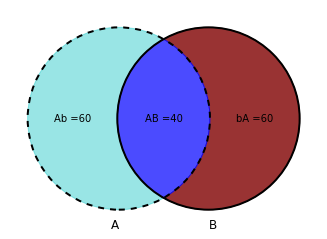

In [20]:
## diagram tails
common =plot_venn_diagram(df_ravi['sequence Iteration 0'], df_ravi['sequence Iteration 1'], oname='sequence_names.png')

In [21]:
df_ravi.columns

Index([u'sequence Iteration 0', u'Score Iteration 0', u'sequence Iteration 1',
       u'Score iteration 1'],
      dtype='object')

In [22]:
def highlight_greater_than(data):
    """
    highlight thhighlight_greater_thane maximum in a Series or DataFrame
    """
    color = 'red' if data in common else 'black'
    return 'color: %s' % color

In [23]:
df_ravi.style.applymap(highlight_greater_than)